In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%matplotlib nbagg


import os, sys, math

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from utils.plots import *
from DM_theory.network import *
from utils.parameters import create_population_values, set_options

In [13]:
options = set_options(L=1,nI=1,nE=0)
options['simulation'] = {
    'rateWnt': [0.,12.],
    'alpha_0': [0,0.02,0.04],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options['tau_I'] = 0.005
options['eps'] = 0
options['mode_stats'] = 2

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]

res = darkMatter(steps=500,options=options,rerun=True,compile=False,logging=3)


options_sharks = set_options(L=1,nI=1,nE=0)
options_sharks['simulation'] = {
    'rateWnt': [0.,20.],
    'alpha_0': [0,0.2],
    'sim_prim': [0,-1,0],
    'sim_sec': [0,-1,0]
}
options_sharks['tau_I'] = 0.005
options_sharks['eps'] = 0
options_sharks['mode_stats'] = 3

#x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]

res_sharks = darkMatter(steps=100,options=options_sharks,rerun=True,compile=False,logging=3)

def done 
def done 


<IPython.core.display.Javascript object>


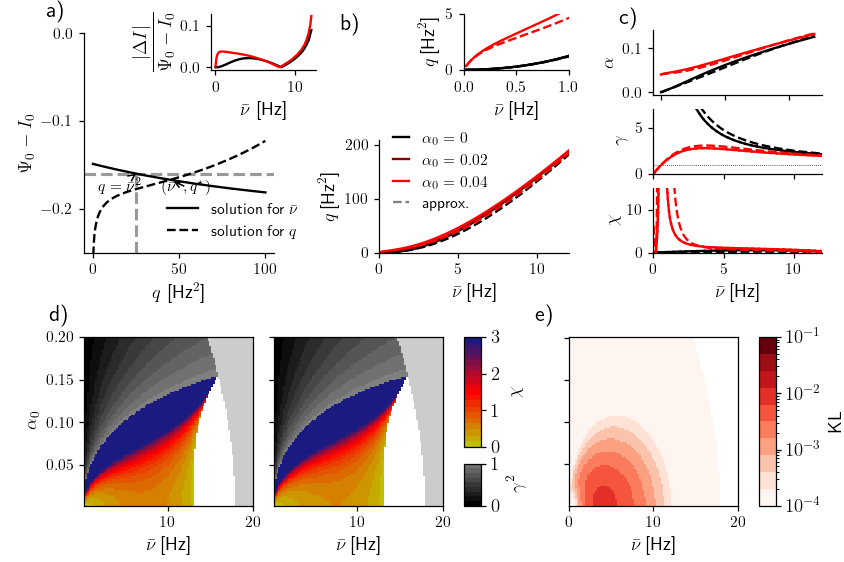

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/network.py:56: RuntimeWarning: divide by zero encountered in log
  return -( self.alpha(q,p)**2 + 1./2 * self.sigma_V(nu, p)**2 ) * np.log( ( q[p,...]/self.rate_max(nu, p)**2 )**2 * (1 + 2*(self.alpha(q,p) / self.sigma_V(nu,p))**2) )
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/utils/plots.py:411: RuntimeWarning: invalid value encountered in sqrt
  dI = abs(np.sqrt(net.I_squared_q(nu,q,0))-np.sqrt(net.I_squared_nu(nu,q,0)))
/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme/DM_theory/network.py:56: RuntimeWarning: divide by zero encountered in log
  return -( self.alpha(q,p)**2 + 1./2 * self.sigma_V(nu, p)**2 ) * np.log( ( q[p,...]/self.rate_max(nu, p)**2 )**2 * (1 + 2*(self.alpha(q,p) / self.sigma_V(nu,p))**2) )


In [14]:
import matplotlib as mpl
%matplotlib nbagg
upper_row = 0.55
lower_row = 0.1
box_height = 0.75
box_width = 0.22
v_space = 0.05
h_space = 0.1


set_plot_params()
plt_para = {
    'title': {
        'descr': False,
        'x_offset': -0.2
    },
    'x': {'key': 'rateWnt', 'lim': 12}
}

fig = plt.figure(figsize=(7.5,5),dpi=75)
ax_approx_ex = plt.axes([0.1,upper_row,0.225,0.39])
ax_I = plt.axes([0.25,upper_row+0.325,0.125,0.1])
ax_q = plt.axes([0.45,upper_row,0.225,0.2])
ax_q_zoom = plt.axes([0.55,upper_row+0.325,0.125,0.1])
ax_alpha = plt.axes([0.775,upper_row+0.28,0.2,0.115])
ax_gamma = plt.axes([0.775,upper_row+0.14,0.2,0.115])
ax_chi = plt.axes([0.775,upper_row,0.2,0.115])

ax_sharkfin = plt.axes([0.1,lower_row,0.2,0.3])
ax_sharkfin_approx = plt.axes([0.325,lower_row,0.2,0.3])
ax_sharkfin_KL = plt.axes([0.675,lower_row,0.2,0.3])

plot_approx(ax_approx_ex,ax_I,ax_alpha)
set_title(ax_approx_ex,1,'',(-0.15,0),10)

plot_q(ax_q,res,plt_para,approx=True,order=0)
set_title(ax_q,2,'',(-0.15,0),70)

ax_q.plot(np.NaN,np.NaN,color='gray',ls='--',label='approx.')
ax_q.legend(prop={'size':10},handlelength=1,bbox_to_anchor=(0.0,1.2),loc='upper left',frameon=False)

plot_q_zoom(ax_q_zoom,res,plt_para|{'x':{'key':'rateWnt', 'lim':1}},idxs=[0,2],approx=True,order=0)

plot_gamma(ax_gamma,res,plt_para,idxs=[0,2],approx=True,order=0)
plot_chi(ax_chi,res,plt_para,idxs=[0,2],approx=True,order=0)
set_title(ax_alpha,3,'',(-0.15,0),-20)

plt.setp(ax_approx_ex,ylabel=r'$\displaystyle \Psi_0 - I_0$',xlabel=r'$\displaystyle q$ [Hz$^2$]')
plt.setp(ax_alpha,xticklabels=[],xlabel=None,ylabel=r'$\displaystyle \alpha$')
plt.setp(ax_gamma,xticklabels=[],xlabel=None,ylabel=r'$\displaystyle \gamma$')
plt.setp(ax_chi,ylabel=r'$\displaystyle \chi$')


order = [o for o in list(options_sharks['simulation']) if not o.startswith('sim')]
p = 0
_ = plot_fins(ax_sharkfin,res_sharks[order[0]],res_sharks[order[1]],res_sharks['gamma'][p,...],res_sharks['chi'][p,...],res_sharks['regions'][p,...],plt_para)
plt.setp(ax_sharkfin,ylabel=r'$\displaystyle \alpha_0$',xlabel=r'$\displaystyle \bar{\nu}\,$[Hz]')
pchi,pgamma = plot_fins(ax_sharkfin_approx,res_sharks[order[0]],res_sharks[order[1]],res_sharks['gamma_approx'][p,...],res_sharks['chi_approx'][p,...],res_sharks['regions_approx'][p,...],plt_para)
plt.setp(ax_sharkfin_approx,yticklabels=[],xlabel=r'$\displaystyle \bar{\nu}\,$[Hz]')
plot_colorbar(pchi,pgamma,plt_para,x=[0.55,0.57],y=[lower_row,lower_row+0.3])

set_title(ax_sharkfin,4,'',(-0.15,0),10)
axcb1 = plt.axes([0.9,0.1,0.02,0.3])
axcb1.tick_params(axis='both', which='major', labelsize=12)
pKL = ax_sharkfin_KL.pcolormesh(res_sharks[order[0]],res_sharks[order[1]],res_sharks['KL_entropy'][p,...],cmap=mpl.cm.get_cmap('Reds',10),shading='auto',norm=mcolors.LogNorm(vmin=10**(-4),vmax=0.1,clip=True))
plt.setp(ax_sharkfin_KL,yticklabels=[],xlim=[0,20],xlabel=r'$\displaystyle \bar{\nu}\,$[Hz]')
set_title(ax_sharkfin_KL,5,'',(-0.15,0),10)

plt.colorbar(pKL, cax = axcb1)#,boundaries=np.linspace(0,3,100),ticks=np.linspace(0,3,7))
axcb1.set_ylabel('KL')

for ax in [ax_approx_ex,ax_I,ax_q,ax_q_zoom,ax_alpha,ax_gamma,ax_chi]:
    ax.spines[['top','right']].set_visible(False)

save=False
if save:
    sv_name = './figures/approximations.%s' % (file_format)
    plt.savefig(sv_name,dpi=300)
    print('Figure saved as "%s"' % sv_name)

plt.show(block=False)

In [39]:
import DM_theory.network as nw
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [47]:
%matplotlib nbagg
#network = nw(eps=np.sqrt(0.5),eta=0.9,alpha_0=0.02)
network = nw(eps=0,eta=0,alpha_0=0.02)
steps_rate = 101
steps_q = 101

rate_raw = np.linspace(0,10,steps_rate)
q_raw = np.linspace(0,40,steps_q)


rateWnt = np.tile(rate_raw,(2,1))[...,np.newaxis]
q = np.tile(q_raw,(2,steps_rate,1))


rate_plot = np.tile(rateWnt[0],(1,steps_q))
q_plot = q[0,...]
I_nu = -np.sqrt(network.I_squared_nu(rateWnt,q,0))
I_q = -np.sqrt(network.I_squared_q(rateWnt,q,0))
I_approx = -np.sqrt(network.I_squared_nu(rateWnt,rateWnt**2,0))
#print(I_approx,I_approx.shape)

dI = I_nu-I_q
np.isfinite(dI)
mx = np.ma.masked_array(np.abs(dI), ~np.isfinite(dI))
idx_cross = np.argmin(mx,axis=1)

dI_approx = np.abs(I_approx-I_q)
mx = np.ma.masked_array(dI_approx, ~np.isfinite(dI_approx))
idx_cross_approx = np.argmin(mx,axis=1)

# create figure
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'surface'},{'type':'xy'}]])
# plot two intersectioned surfaces

surface_nu = go.Surface(x=rate_plot, y=q_plot, z=I_nu, colorscale='Greys', showscale=False)
fig.add_trace(surface_nu, row=1, col=1)
surface_q = go.Surface(x=rate_plot, y=q_plot, z=I_q, colorscale='viridis', showscale=False)
fig.add_trace(surface_q, row=1, col=1)
#surface_approx = go.Surface(x=rate_plot, y=q_plot, z=np.tile(I_approx,(1,steps_q)), colorscale='Gray', showscale=False)
#fig.add_trace(surface_approx, row=1, col=1)

line_cross = go.Scatter3d(x=rate_raw,y=q_raw[idx_cross],z=I_q[np.arange(steps_rate),idx_cross],mode='lines',line={
        'color':'red',
        'width':5
    })
line_cross_approx = go.Scatter3d(x=rate_raw,y=q_raw[idx_cross_approx],z=I_q[np.arange(steps_rate),idx_cross_approx],mode='lines',line={
        'color':'purple',
        'width':5,
    })

delta_I = dI[np.arange(steps_rate),idx_cross] - dI_approx[np.arange(steps_rate),idx_cross_approx]

print(dI.shape)
#print(dI[idx_cross])
print(delta_I)
fig.add_trace(line_cross, row=1, col=1)
fig.add_trace(line_cross_approx, row=1, col=1)

fig.add_trace(go.Scatter(x=rate_raw,y=delta_I/I_q[np.arange(steps_rate),idx_cross],mode='lines'),row=1,col=2)
fig.show()


(101, 101)
[            nan  8.76647587e-04 -1.68111036e-03 -1.14116145e-04
  1.47256754e-03 -6.37975870e-04  8.94290630e-04 -6.55830158e-05
 -7.01381342e-04 -1.14013930e-03  3.97412040e-04  3.89546301e-04
  2.14264143e-04  4.25743542e-04  4.57279903e-04 -5.11495139e-04
 -9.73539265e-05  3.24900143e-04 -2.51824185e-04  2.25060124e-04
 -1.01499391e-04 -2.73588242e-04  3.23639072e-04  1.33779442e-04
  1.86811373e-04  4.00128517e-05  1.99471155e-04  1.62611791e-04
 -2.29449485e-04 -1.66505522e-04  9.85884742e-05 -2.46177919e-04
 -7.24356772e-05 -2.55575565e-04  1.05892307e-04 -1.72213239e-04
 -3.47088787e-04  1.21214745e-04  7.56556631e-05 -4.92825355e-05
 -1.39758338e-04 -1.97609450e-04 -1.94911689e-04 -1.41777127e-04
 -7.43637723e-05  6.02492721e-06  9.82073757e-05 -2.66118071e-04
 -1.16445511e-03 -2.07257273e-03 -3.44809925e-03 -3.91994887e-03
 -3.49847398e-03 -3.09543384e-03 -2.71064996e-03 -2.34397136e-03
 -1.99527319e-03 -1.66445561e-03 -1.35144270e-03 -1.05618161e-03
 -7.78641824e-